In [15]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [16]:
def load_dist(sys, path, theory):
    return numpy.load(f'./dist_npy/{sys}.{path[:2]}.{theory}.dist.npy'),  numpy.load(f'./dist_npy/{sys}.{path[:2]}.{theory}.label.npy')

['LYS.72.HZ2:SER.69.OG' 'LYS.72.HZ2:LYS.72.NZ' 'LYS.72.HZ1:LYS.72.NZ'
 'LYS.72.HZ1:SER.129.OG' 'SER.129.HG1:SER.129.OG' 'SER.129.HG1:CEX.285.N5'
 'SER.129.HG1:CEX.285.O10B' 'SER.69.HG1:CEX.285.C8' 'SER.69.OG:CEX.285.C8'
 'CEX.285.N5:CEX.285.C8' 'CEX.285.C8:CEX.285.C7' 'CEX.285.C8:CEX.285.O8']


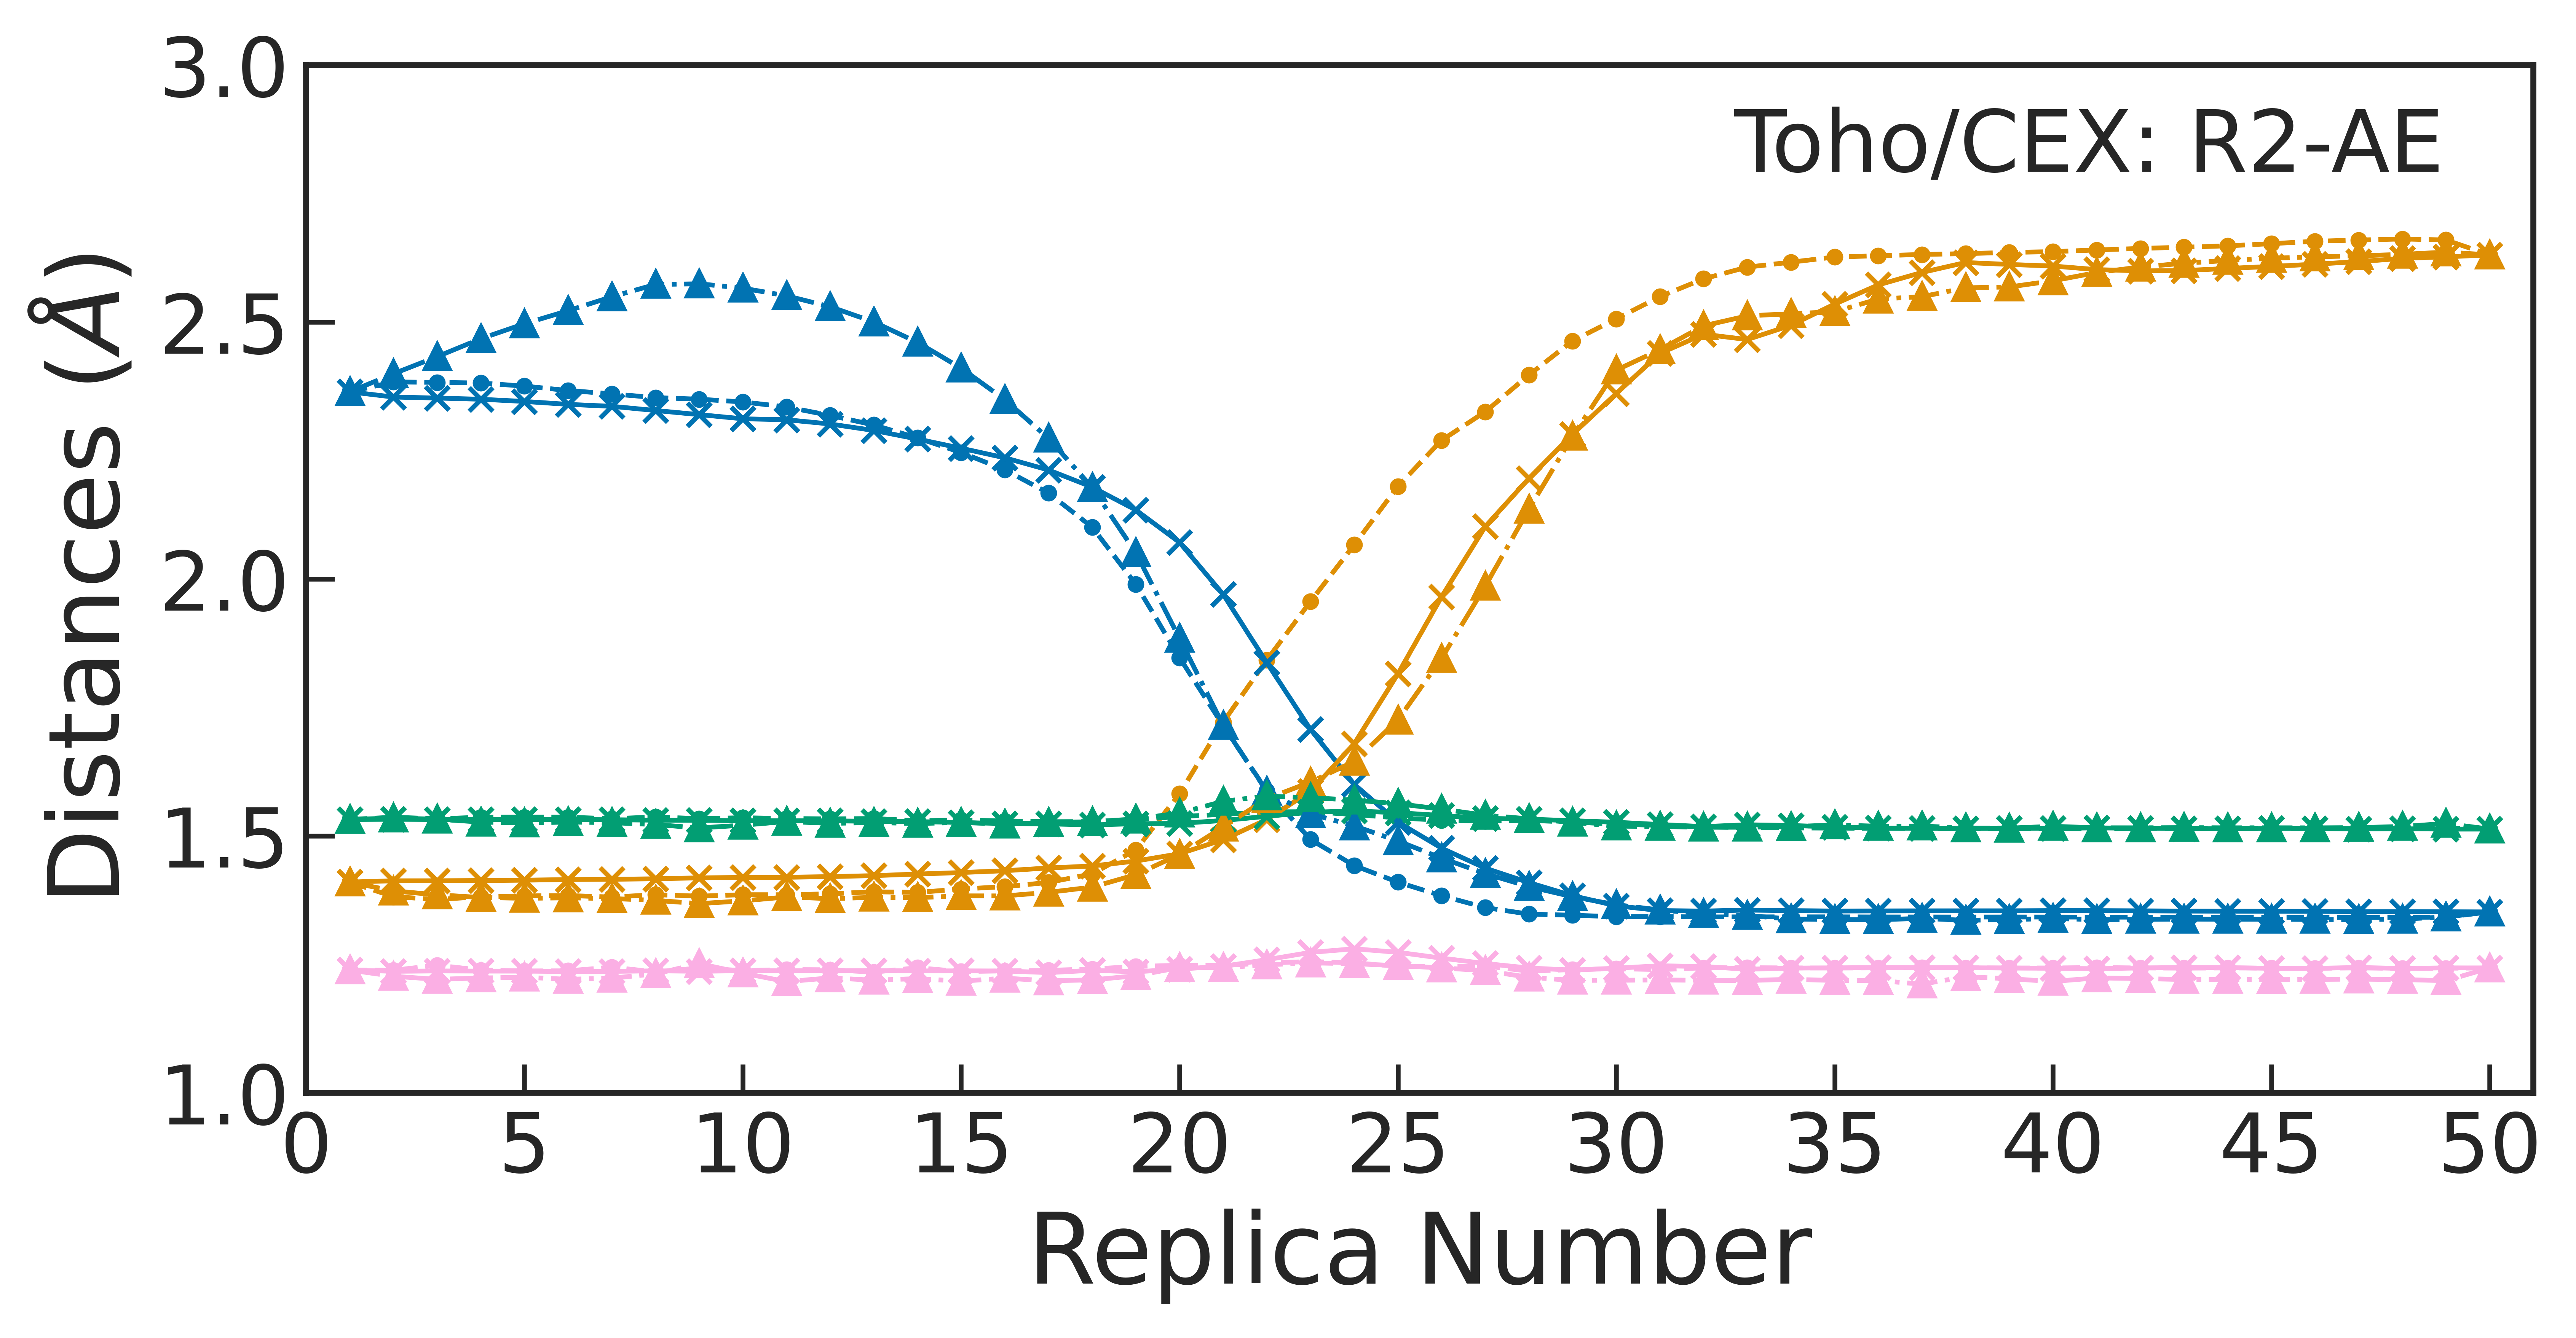

In [20]:
# init figure ==================================================================
fig, ax,  = plt.subplots(figsize=(8, 8), dpi=900, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1/8, right=7.5/8, top=4/8, bottom=1/8)

# spine
ax.set_xlim(0, 51)
ax.set_ylim(1, 3)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.xticks([5*x for x in range(11)])

ax.set_xlabel(r'Replica Number', fontsize='xx-large')
ax.set_ylabel('Distances '+r'($\AA$)', fontsize='xx-large')

# tick & labels on x and y
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )

# load dftb data ================================================================
sysname='toho_cex'
pathname='r2-ae'

dftb3, lbl = load_dist(sysname, pathname, 'dftb3')
dftb3 = dftb3[:, -4:]
d3obf, lbl = load_dist(sysname, pathname, '3obf' )
d3obf = d3obf[:, -4:]
b3lyp, lbl = load_dist(sysname, pathname, 'b3lyp_pol_disp')
b3lyp = b3lyp[:, -4:]

print(lbl)
lbl = lbl[-4:]
lbl = [
    r'AMP C7 - Ser70 O$\gamma$',
    r'AMP C7 - AMP N4',
    r'AMP C7 - AMP C6',
    r'AMP C7 - AMP O7',
] if sysname == 'toho_amp' else [
    r'CEX C8 - Ser70 O$\gamma$',
    r'CEX C8 - CEX N5',
    r'CEX C8 - CEX C7',
    r'CEX C8 - CEX O8',
]

cindex = [0,1,2,6]

ax.text(0.96, 0.96,
        sysname[0].upper() + sysname[1:4].lower() + sysname[4:].replace('_', '/').upper() + ': ' + pathname.upper(), 
        ha='right', va='top', transform=ax.transAxes, fontsize=18)

allp = []
for i in range(len(lbl)):
    if i == 0:
        p = ax.plot([0], marker='None', linestyle='None', label='DFTB3/3OB/C36')
        allp.append(p)
    p = ax.plot(numpy.arange(1, 51), dftb3[:, i], ls='--', color=sns.color_palette('colorblind')[cindex[i]], 
            marker='.', markersize=5, linewidth=1, label=lbl[i])
    allp.append(p)

for i in range(len(lbl)):
    if i == 0:
        p = ax.plot([0], marker='None', linestyle='None', label='DFTB3/3OB-f/C36')
        allp.append(p)
    p = ax.plot(numpy.arange(1, 51), d3obf[:, i], ls='-',  color=sns.color_palette('colorblind')[cindex[i]], 
            marker='x', markersize=5, linewidth=1, label=lbl[i])
    allp.append(p)

for i in range(len(lbl)):
    if i == 0:
        p = ax.plot([0], marker='None', linestyle='None', label='B3LYP-D3/6-31G**/C36')
        allp.append(p)
    ax.plot(numpy.arange(1, 51), b3lyp[:, i], ls='-.', color=sns.color_palette('colorblind')[cindex[i]], 
            marker='^', markersize=5, linewidth=1, label=lbl[i])
    allp.append(p)

if sysname == 'toho_amp': 
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', mode="expand", borderaxespad=0., ncol=len(lbl)-1, frameon=False)

fig.savefig('{0}_{1}_bm.png'.format(sysname, pathname.replace('-', '')))
plt.show()

['LYS.72.HZ2:SER.69.OG' 'LYS.72.HZ2:LYS.72.NZ' 'LYS.72.HZ1:LYS.72.NZ'
 'LYS.72.HZ1:SER.129.OG' 'SER.129.HG1:SER.129.OG' 'SER.129.HG1:CEX.285.N5'
 'SER.129.HG1:CEX.285.O10B' 'SER.69.HG1:CEX.285.C8' 'SER.69.OG:CEX.285.C8'
 'CEX.285.N5:CEX.285.C8' 'CEX.285.C8:CEX.285.C7' 'CEX.285.C8:CEX.285.O8']


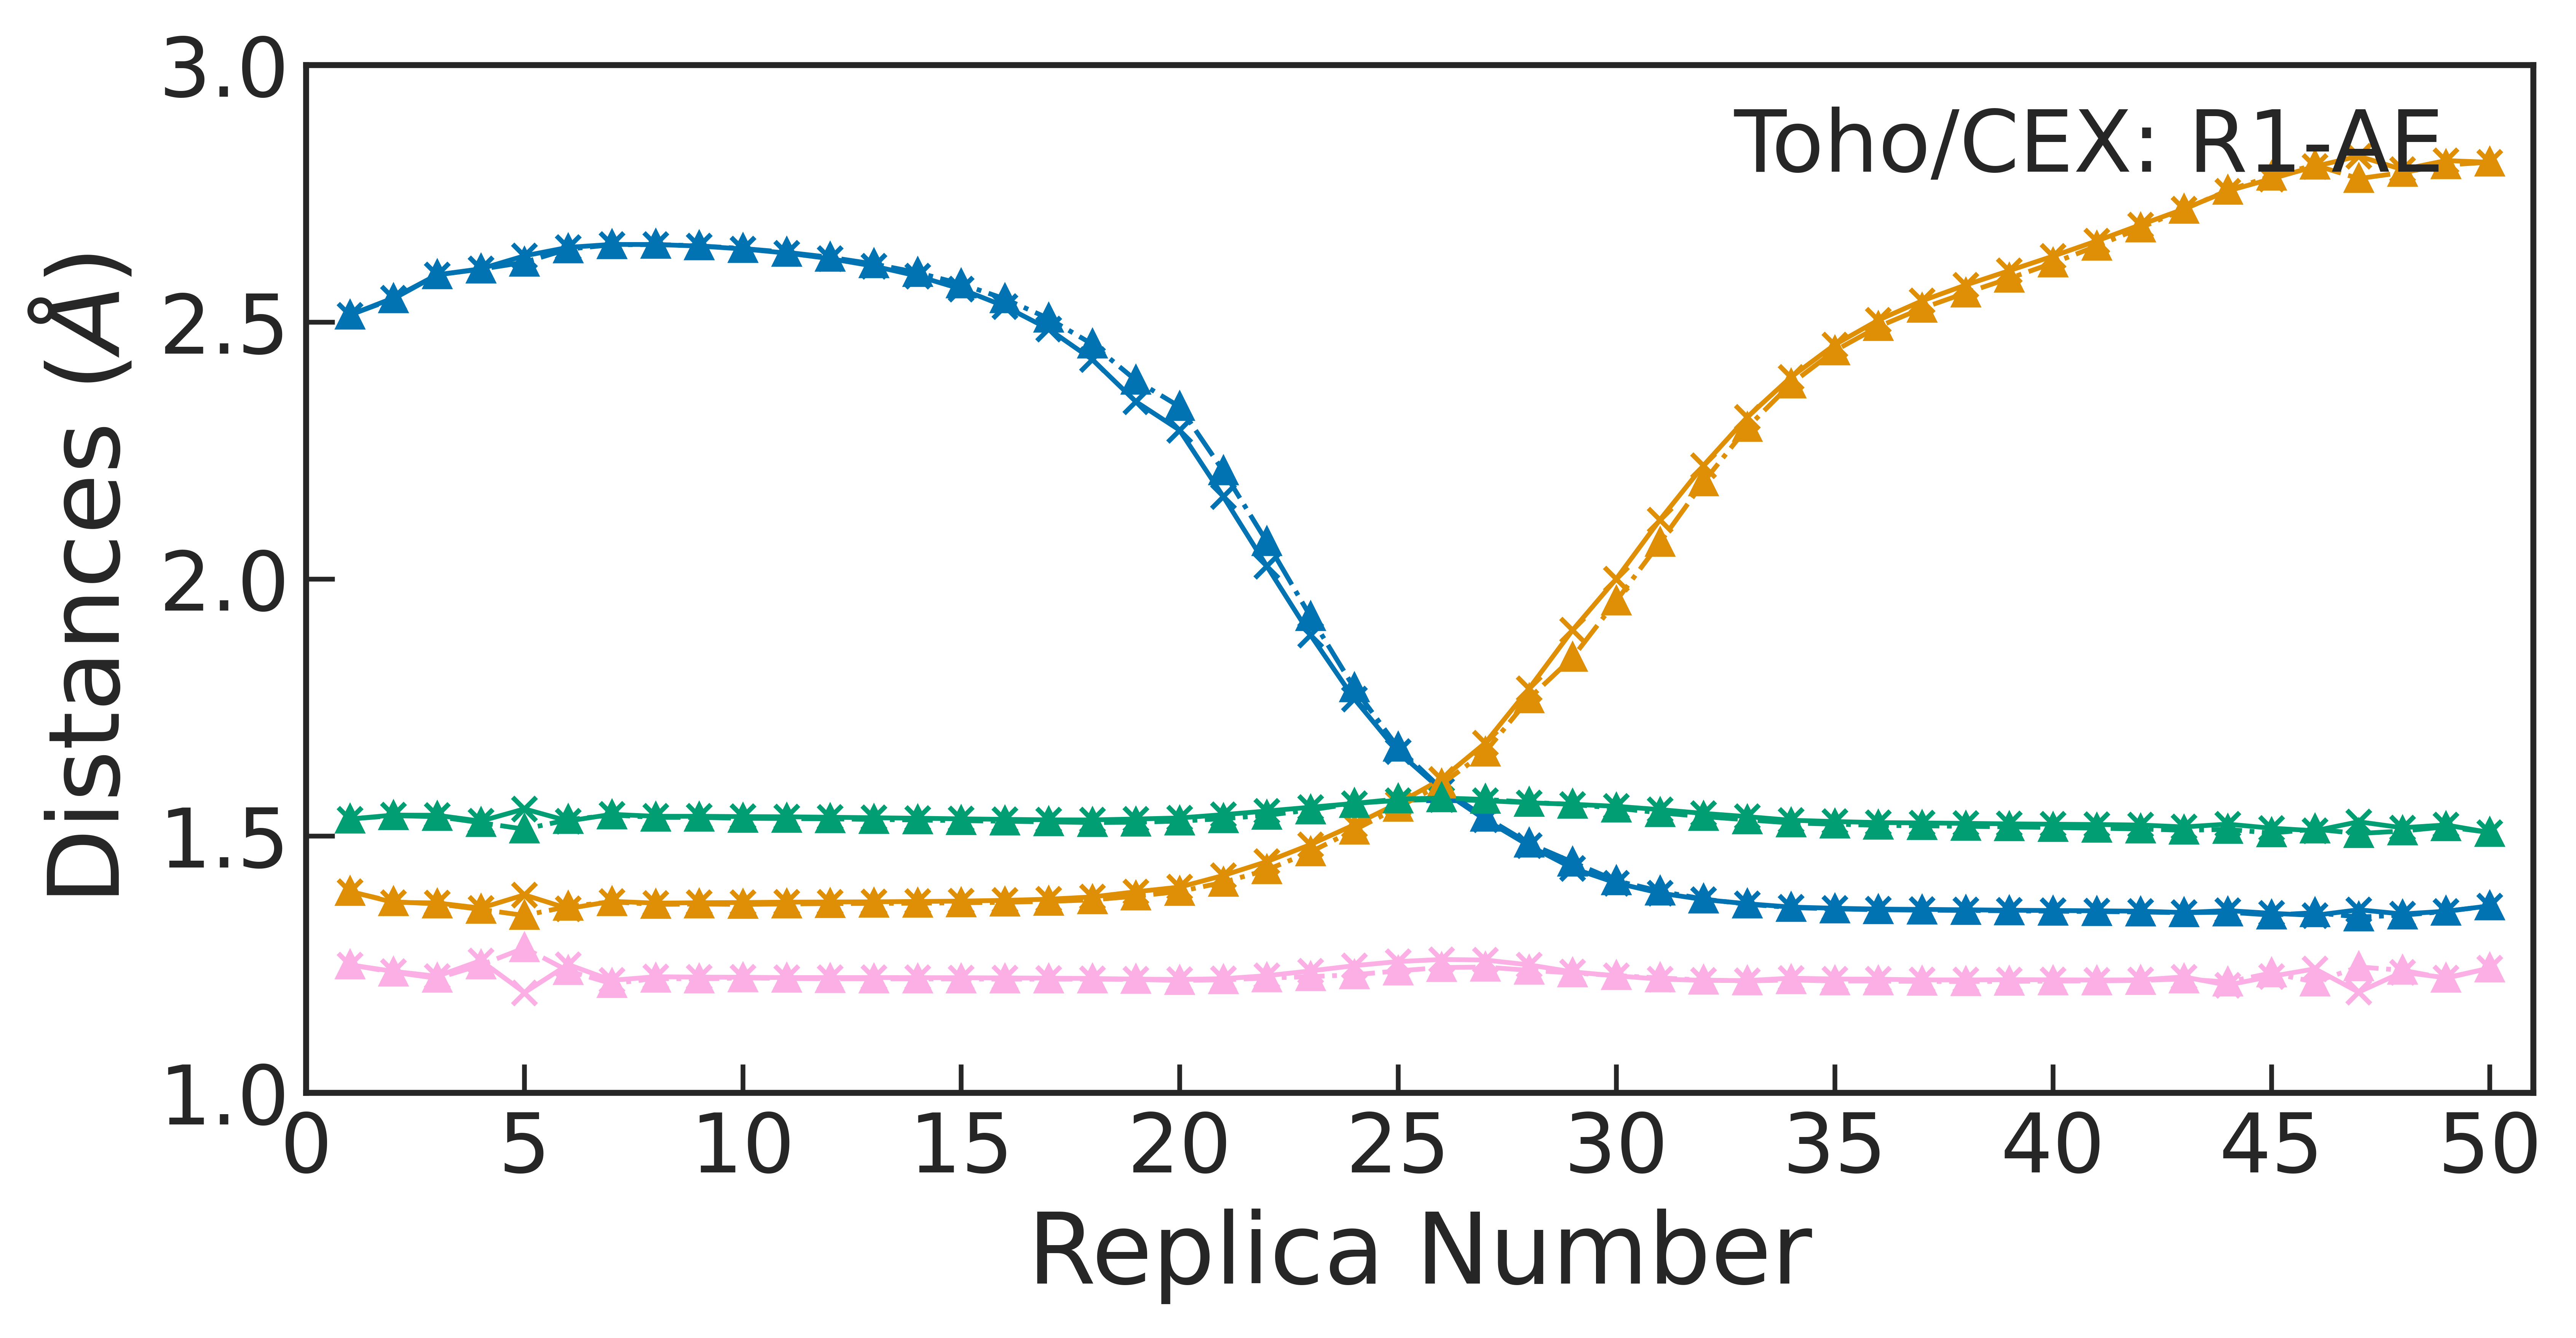

In [25]:
# init figure ==================================================================
fig, ax,  = plt.subplots(figsize=(8, 8), dpi=900, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1/8, right=7.5/8, top=4/8, bottom=1/8)

# spine
ax.set_xlim(0, 51)
ax.set_ylim(1, 3)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.xticks([5*x for x in range(11)])

ax.set_xlabel(r'Replica Number', fontsize='xx-large')
ax.set_ylabel('Distances '+r'($\AA$)', fontsize='xx-large')

# tick & labels on x and y
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )

# load dftb data ================================================================
sysname='toho_cex'
pathname='r1-ae'

b3lyp, lbl = load_dist(sysname, pathname, 'b3lyp_pol')
b3lyp = b3lyp[:, -4:]

b3lyp_pol, lbl = load_dist(sysname, pathname, 'b3lyp_pol_disp')
b3lyp_pol = b3lyp_pol[:, -4:]

print(lbl)
lbl = lbl[-4:]
lbl = [
    r'AMP C7 - Ser70 O$\gamma$',
    r'AMP C7 - AMP N4',
    r'AMP C7 - AMP C6',
    r'AMP C7 - AMP O7',
] if sysname == 'toho_amp' else [
    r'CEX C8 - Ser70 O$\gamma$',
    r'CEX C8 - CEX N5',
    r'CEX C8 - CEX C7',
    r'CEX C8 - CEX O8',
]

cindex = [0,1,2,6]

ax.text(0.96, 0.96,
        sysname[0].upper() + sysname[1:4].lower() + sysname[4:].replace('_', '/').upper() + ': ' + pathname.upper(), 
        ha='right', va='top', transform=ax.transAxes, fontsize=18)

allp = []
for i in range(len(lbl)):
    if i == 0:
        p = ax.plot([0], marker='None', linestyle='None', label='B3LYP/6-31G*/C36')
        allp.append(p)
    p = ax.plot(numpy.arange(1, 51), b3lyp[:, i], ls='-',  color=sns.color_palette('colorblind')[cindex[i]], 
            marker='x', markersize=5, linewidth=1, label=lbl[i])
    allp.append(p)


for i in range(len(lbl)):
    if i == 0:
        p = ax.plot([0], marker='None', linestyle='None', label='B3LYP-D3/6-31G**/C36')
        allp.append(p)
    ax.plot(numpy.arange(1, 51), b3lyp_pol[:, i], ls='-.', color=sns.color_palette('colorblind')[cindex[i]], 
            marker='^', markersize=5, linewidth=1, label=lbl[i])
    allp.append(p)

if sysname == 'toho_amp': 
    plt.legend(bbox_to_anchor=(1., 1.), loc='lower right', ncol=2, frameon=False)

fig.savefig('{0}_{1}_bm_b3lyp.png'.format(sysname, pathname.replace('-', '')))
plt.show()